No eigenvalues, but other constraints.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import bisect

%matplotlib inline

In [24]:
target_x = 7.5
cannon_x = -7.5
domain = np.linspace(-10, 10, 1000)
terrain = np.exp(-domain**2/4)
def plot_solution(trajectory=None,
                  domain=domain,
                  terrain=terrain,
                  target_x=target_x,
                  cannon_x=cannon_x):
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    
    # plot the terrain
    ax.plot(domain, terrain)

    # if we have a trajectory, plot it
    if trajectory is not None:
        ax.plot(trajectory[:,0], trajectory[:,1])

    # locate the cannon and the target
    ax.plot(target_x, terrain[np.argmax(terrain<target_x)], "rx", markersize=18)
    ax.plot(cannon_x, terrain[np.argmax(terrain<cannon_x)], "gx", markersize=18)

    # set up limits on the plot
    terrain_height = np.max(terrain) - np.min(terrain)
    ax.set_ylim(np.min(terrain) - 0.1*terrain_height,
                np.max(terrain) + 0.5*terrain_height)
    ax.set_xlim(np.min(domain), np.max(domain))

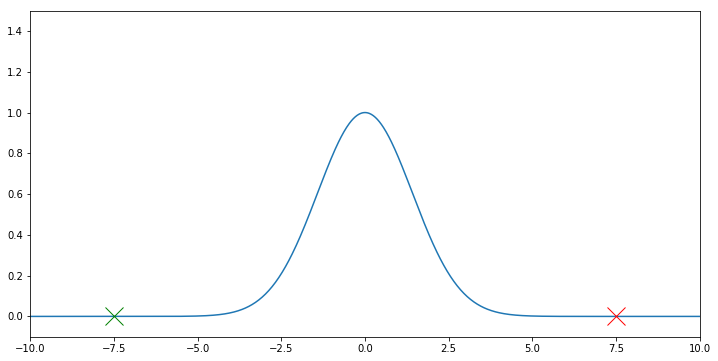

In [25]:
plot_solution()

In [13]:
def proj_drag(r, t, g=9.8, b=0.01, c=0.01, m=1):
    """The RHS of Newton's 2nd law for projectile motion with drag"""    
    x,y,vx,vy = r
    
    vsq = vx**2 + vy**2
    vmag = np.sqrt(vsq)
    
    dx = vx
    dy = vy
    dvx = - b*vx/m - c*vsq*vx/(vmag*m)
    dvy = -g - b*vy/m - c*vsq*vy/(vmag*m)
    
    return np.array([dx, dy, dvx, dvy])

In [21]:
x0 = cannon_x
y0 = terrain[np.argmax(domain<=cannon_x)]
v0x = 20.0
v0y = 20.0
ic = (x0, y0, v0x, v0y)
ic

(-7.5, 1.3887943864964021e-11, 20.0, 20.0)

In [22]:
result = odeint(proj_drag, ic, domain)

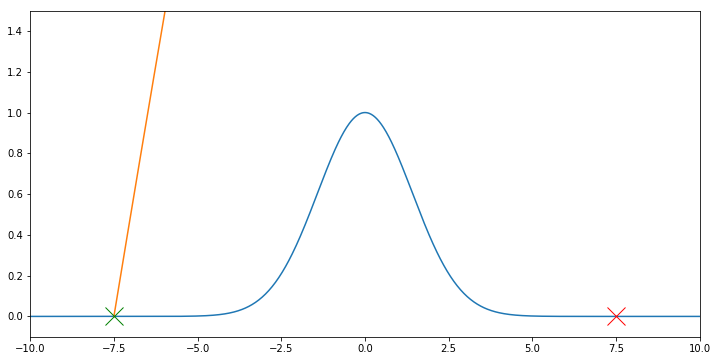

In [26]:
plot_solution(result)

In [78]:
def ignore_terrain(v0x, v0y=20):
    x0 = cannon_x
    y0 = terrain[np.argmax(domain>=cannon_x)]
    ic = (x0, y0, v0x, v0y)

    #print("v0x: {}".format(v0x))
    testimated = 10*(target_x - cannon_x)/v0x
    #print("testimated: {}".format(testimated))
    
    times = np.linspace(0, testimated, 1000)
    result = odeint(proj_drag, ic, times)
    
    target_y = terrain[np.argmax(domain>target_x)]
    #print("target_y: {}".format(target_y))
    
    traj_index = np.argmax(result[:,0] > target_x)
    #print("target_x, max(result_x): {}, {}".format(target_x, np.max(result[:,0])))
    #print("traj_index: {}".format(traj_index))
    #print("--------------------------")
    if traj_index > 0:
        return result[traj_index,1] - target_y
    else:
        return -1

In [79]:
ignore_terrain(2)

-1

In [80]:
ignore_terrain(20)

11.817851999314277

In [81]:
bisect(ignore_terrain, 2, 20)

5.007836342408723

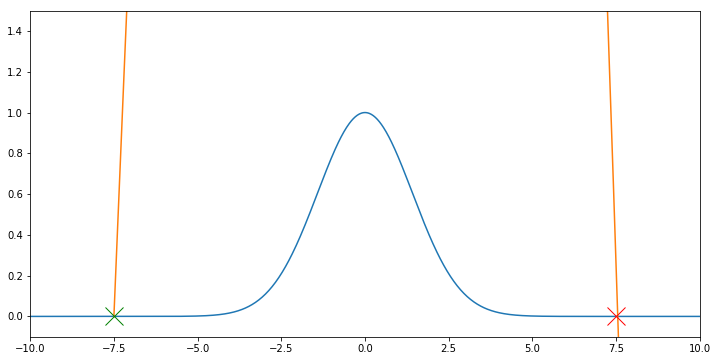

In [82]:
x0 = cannon_x
y0 = terrain[np.argmax(domain<=cannon_x)]
v0y = 20.0
v0x = bisect(ignore_terrain, 2, 20, args=(v0y,))
ic = (x0, y0, v0x, v0y)
result = odeint(proj_drag, ic, domain)
plot_solution(result)

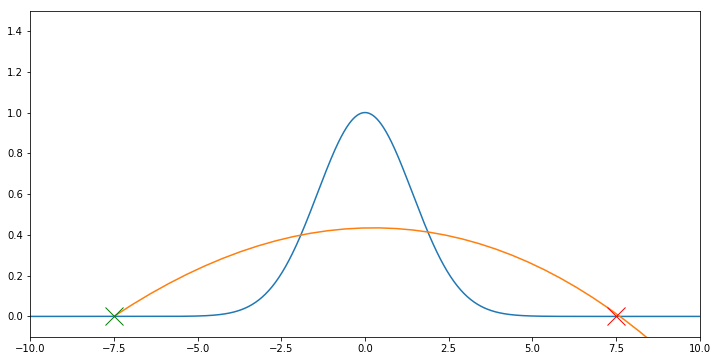

In [91]:
x0 = cannon_x
y0 = terrain[np.argmax(domain<=cannon_x)]
v0y = 3.0
v0x = bisect(ignore_terrain, 20, 200, args=(v0y,))
ic = (x0, y0, v0x, v0y)
result = odeint(proj_drag, ic, domain)
plot_solution(result)